In [ ]:
#######################################################################################NOTE#######################################################################################
# if running on shared drive please uncomment the two lines
#######################################################################################NOTE#######################################################################################
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
import keras
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
#read in game data with some basic box score stats from seasons 2003-2020
#######################################################################################NOTE#######################################################################################
# if running on shared drive please uncomment the paths for shared drive and comment the others
#######################################################################################NOTE#######################################################################################
#games = pd.read_csv('/content/drive/Shareddrives/CS 584/notebooks/games.csv').dropna(axis=0)
games = pd.read_csv('last_n_datasets/games.csv').dropna(axis=0)

In [ ]:
print("Features in the raw data:")
games.columns

Features in the raw data:


Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [ ]:
#drop unnecessary columns
games = games.drop(labels=['GAME_ID', 'TEAM_ID_away', 'TEAM_ID_home', 'GAME_STATUS_TEXT'], axis=1)
games['GAME_DATE_EST'] = pd.to_datetime(games['GAME_DATE_EST'])

In [ ]:
#drop the 2003 season as CHA was not in the league this season
games = games[games['SEASON'] != 2003]

In [ ]:
#replace all ID numbers with team names to make data easier to read and handle
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].astype(str)
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612737','ATL')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612738','BOS')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612740','NOP')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612741','CHI')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612742','DAL')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612743','DEN')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612745','HOU')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612746','LAC')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612747','LAL')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612748','MIA')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612749','MIL')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612750','MIN')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612751','BKN')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612752','NYK')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612753','ORL')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612754','IND')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612755','PHI')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612756','PHX')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612757','POR')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612758','SAC')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612759','SAS')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612760','OKC')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612761','TOR')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612762','UTA')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612763','MEM')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612764','WAS')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612765','DET')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612766','CHA')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612739','CLE')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612744','GSW')

games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].astype(str)
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612737','ATL')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612738','BOS')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612740','NOP')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612741','CHI')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612742','DAL')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612743','DEN')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612745','HOU')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612746','LAC')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612747','LAL')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612748','MIA')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612749','MIL')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612750','MIN')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612751','BKN')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612752','NYK')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612753','ORL')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612754','IND')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612755','PHI')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612756','PHX')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612757','POR')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612758','SAC')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612759','SAS')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612760','OKC')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612761','TOR')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612762','UTA')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612763','MEM')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612764','WAS')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612765','DET')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612766','CHA')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612739','CLE')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612744','GSW')

In [ ]:
#create list of team names for further data processing purposes
team_names = ['ATL', 'BOS', 'NOP', 'CHI','DAL', 'DEN', 'HOU', 'LAC', 'LAL', 'MIA', 'MIL', 'MIN', 
              'BKN', 'NYK', 'ORL', 'IND', 'PHI', 'PHX', 'POR', 'SAC', 'SAS',
              'OKC', 'TOR', 'UTA', 'MEM', 'WAS', 'DET', 'CHA', 'CLE', 'GSW']

In [ ]:
games.head()

,GAME_DATE_EST,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-05-26,PHI,WAS,2020,120.0,0.557,0.684,0.429,26.0,45.0,95.0,0.402,0.633,0.091,22.0,40.0,1
1,2021-05-26,NYK,ATL,2020,101.0,0.383,0.739,0.364,15.0,54.0,92.0,0.369,0.818,0.273,17.0,41.0,1
2,2021-05-26,UTA,MEM,2020,141.0,0.544,0.774,0.487,28.0,42.0,129.0,0.541,0.763,0.348,20.0,33.0,1
3,2021-05-25,BKN,BOS,2020,130.0,0.523,0.955,0.447,31.0,46.0,108.0,0.424,0.783,0.353,23.0,43.0,1
4,2021-05-25,PHX,LAL,2020,102.0,0.465,0.933,0.308,21.0,31.0,109.0,0.450,0.871,0.303,24.0,39.0,0


In [ ]:
rs = np.random.RandomState(0)
corr = games.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
SEASON,1.00,0.31,0.02,0.06,0.02,0.19,0.17,0.34,0.05,0.06,0.01,0.25,0.20,-0.03
PTS_home,0.31,1.00,0.66,0.18,0.43,0.60,0.16,0.47,0.12,0.07,0.05,0.20,-0.14,0.41
FG_PCT_home,0.02,0.66,1.00,0.02,0.45,0.55,-0.19,0.11,0.04,0.03,0.01,0.01,-0.47,0.43
FT_PCT_home,0.06,0.18,0.02,1.00,0.03,0.02,-0.05,0.07,0.04,0.04,0.02,0.02,-0.11,0.09
FG3_PCT_home,0.02,0.43,0.45,0.03,1.00,0.35,-0.09,0.04,0.00,0.01,-0.00,-0.01,-0.20,0.30
AST_home,0.19,0.60,0.55,0.02,0.35,1.00,0.06,0.18,0.01,0.02,-0.01,0.14,-0.11,0.30
REB_home,0.17,0.16,-0.19,-0.05,-0.09,0.06,1.00,-0.15,-0.48,-0.12,-0.21,-0.10,0.07,0.25
PTS_away,0.34,0.47,0.11,0.07,0.04,0.18,-0.15,1.00,0.67,0.20,0.41,0.59,0.18,-0.42
FG_PCT_away,0.05,0.12,0.04,0.04,0.00,0.01,-0.48,0.67,1.00,0.04,0.44,0.52,-0.17,-0.44
FT_PCT_away,0.06,0.07,0.03,0.04,0.01,0.02,-0.12,0.20,0.04,1.00,0.03,0.03,-0.04,-0.11


In [ ]:
#group dataframe by season
bySeason = {key: games.loc[value] for key, value in games.groupby("SEASON").groups.items()}

In [ ]:
def plot_mae(history):
  plt.plot(history.history['mae'])
  plt.plot(history.history['val_mae'])
  plt.title('Model MAE')
  plt.ylabel('MAE')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='upper left')
  plt.show()

#plots the loss history of the model using history data from model.compile
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='upper left')
  plt.show()

#plots the accuracy history of the model using history data from model.compile
def plot_accuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='upper left')
  plt.show()

#build function to gather average team performance over last n games
#returns np array with statistics [pts, fg%, ft%, 3pt%, assits, reb]
def get_avg_last_n_games(team, date, game_data, n):
  prev_games = game_data[game_data['GAME_DATE_EST'] < date][(game_data['HOME_TEAM_ID'] == team) | (game_data['VISITOR_TEAM_ID'] == team)].sort_values(by = 'GAME_DATE_EST').tail(n)
  home = prev_games[prev_games['HOME_TEAM_ID'] == team].iloc[:,range(4,10)]
  away = prev_games[prev_games['HOME_TEAM_ID'] != team].iloc[:,range(10,16)]
  away.columns = home.columns
  features = pd.concat((home, away), axis=0 )
  return features.mean(axis=0)


def get_recent_performance_last_n_games(game_data, n):
  recent_performance = pd.DataFrame()
  home_win = []

  for index, row in game_data.iterrows():
    game_date = row['GAME_DATE_EST']
    home_team = row['HOME_TEAM_ID']
    away_team = row['VISITOR_TEAM_ID']
    
    home_recent = get_avg_last_n_games(home_team, game_date, games, n)
    home_recent.index = ['home_last_n_avg_' + x for x in home_recent.index]

    away_recent = get_avg_last_n_games(away_team, game_date, games, n)
    away_recent.index = ['away_last_n_avg_' + x for x in away_recent.index]

    new_row = pd.concat([home_recent, away_recent], sort=False)

    if new_row.isnull().any().any() == False:
      recent_performance = recent_performance.append(new_row, ignore_index=True)
      recent_performance = recent_performance[new_row.index]
      home_win.append(row['HOME_TEAM_WINS'])

  recent_performance = recent_performance.dropna(axis=0)
  return np.asanyarray(recent_performance), np.asanyarray(home_win)

In [ ]:
"""Initially used to compile the data and save all datasets as CSV. Not necessary to run unless new datasets 
are to be generated"""

"""last_1_features, last_1_results = get_recent_performance_last_n_games(games, 1)
last_5_features, last_5_results = get_recent_performance_last_n_games(games, 5)
last_10_features, last_10_results = get_recent_performance_last_n_games(games, 10)
last_20_features, last_20_results = get_recent_performance_last_n_games(games, 20)
last_30_features, last_30_results = get_recent_performance_last_n_games(games, 30)
last_40_features, last_40_results = get_recent_performance_last_n_games(games, 40)
last_50_features, last_50_results = get_recent_performance_last_n_games(games, 50)

pd.DataFrame(last_1_features).to_csv('/content/drive/Shareddrives/CS 584/notebooks/last_1_features.csv')
pd.DataFrame(last_1_results).to_csv('/content/drive/Shareddrives/CS 584/notebooks/last_1_results.csv')
pd.DataFrame(last_5_features).to_csv('/content/drive/Shareddrives/CS 584/notebooks/last_5_features.csv')
pd.DataFrame(last_5_results).to_csv('/content/drive/Shareddrives/CS 584/notebooks/last_5_results.csv')
pd.DataFrame(last_10_features).to_csv('/content/drive/Shareddrives/CS 584/notebooks/last_10_features.csv')
pd.DataFrame(last_10_results).to_csv('/content/drive/Shareddrives/CS 584/notebooks/last_10_results.csv')
pd.DataFrame(last_20_features).to_csv('/content/drive/Shareddrives/CS 584/notebooks/last_20_features.csv')
pd.DataFrame(last_20_results).to_csv('/content/drive/Shareddrives/CS 584/notebooks/last_20_results.csv')
pd.DataFrame(last_30_features).to_csv('/content/drive/Shareddrives/CS 584/notebooks/last_30_features.csv')
pd.DataFrame(last_30_results).to_csv('/content/drive/Shareddrives/CS 584/notebooks/last_30_results.csv')
pd.DataFrame(last_40_features).to_csv('/content/drive/Shareddrives/CS 584/notebooks/last_40_features.csv')
pd.DataFrame(last_40_results).to_csv('/content/drive/Shareddrives/CS 584/notebooks/last_40_results.csv')
pd.DataFrame(last_50_features).to_csv('/content/drive/Shareddrives/CS 584/notebooks/last_50_features.csv')
pd.DataFrame(last_50_results).to_csv('/content/drive/Shareddrives/CS 584/notebooks/last_50_results.csv')"""

"last_1_features, last_1_results = get_recent_performance_last_n_games(games, 1)\nlast_5_features, last_5_results = get_recent_performance_last_n_games(games, 5)\nlast_10_features, last_10_results = get_recent_performance_last_n_games(games, 10)\nlast_20_features, last_20_results = get_recent_performance_last_n_games(games, 20)\nlast_30_features, last_30_results = get_recent_performance_last_n_games(games, 30)\nlast_40_features, last_40_results = get_recent_performance_last_n_games(games, 40)\nlast_50_features, last_50_results = get_recent_performance_last_n_games(games, 50)\n\npd.DataFrame(last_1_features).to_csv('/content/drive/Shareddrives/CS 584/notebooks/last_1_features.csv')\npd.DataFrame(last_1_results).to_csv('/content/drive/Shareddrives/CS 584/notebooks/last_1_results.csv')\npd.DataFrame(last_5_features).to_csv('/content/drive/Shareddrives/CS 584/notebooks/last_5_features.csv')\npd.DataFrame(last_5_results).to_csv('/content/drive/Shareddrives/CS 584/notebooks/last_5_results.cs

In [ ]:
#read in features from previously saved CSV files, normalize columns 
#######################################################################################NOTE#######################################################################################
# if running on shared drive please uncomment the paths for shared drive and comment the others
#######################################################################################NOTE#######################################################################################
#last_1_features = pd.read_csv('/content/drive/Shareddrives/CS 584/notebooks/last_n_datasets/last_1_features.csv', index_col=0)
last_1_features = pd.read_csv('last_n_datasets/last_1_features.csv', index_col=0)
last_1_features = np.asanyarray(last_1_features.apply(lambda x: x / x.max()))
#last_5_features = pd.read_csv('/content/drive/Shareddrives/CS 584/notebooks/last_n_datasets/last_5_features.csv', index_col=0)
last_5_features = pd.read_csv('last_n_datasets/last_5_features.csv', index_col=0)
last_5_features = np.asanyarray(last_5_features.apply(lambda x: x / x.max()))
#last_10_features = pd.read_csv('/content/drive/Shareddrives/CS 584/notebooks/last_n_datasets/last_10_features.csv', index_col=0)
last_10_features = pd.read_csv('last_n_datasets/last_10_features.csv', index_col=0)
last_10_features = np.asanyarray(last_10_features.apply(lambda x: x / x.max()))
#last_20_features = pd.read_csv('/content/drive/Shareddrives/CS 584/notebooks/last_n_datasets/last_20_features.csv', index_col=0)
last_20_features = pd.read_csv('last_n_datasets/last_20_features.csv', index_col=0)
last_20_features = np.asanyarray(last_20_features.apply(lambda x: x / x.max()))
#last_30_features = pd.read_csv('/content/drive/Shareddrives/CS 584/notebooks/last_n_datasets/last_30_features.csv', index_col=0)
last_30_features = pd.read_csv('last_n_datasets/last_30_features.csv', index_col=0)
last_30_features = np.asanyarray(last_30_features.apply(lambda x: x / x.max()))
#last_40_features = pd.read_csv('/content/drive/Shareddrives/CS 584/notebooks/last_n_datasets/last_40_features.csv', index_col=0)
last_40_features = pd.read_csv('last_n_datasets/last_40_features.csv', index_col=0)
last_40_features = np.asanyarray(last_40_features.apply(lambda x: x / x.max()))
#last_50_features = pd.read_csv('/content/drive/Shareddrives/CS 584/notebooks/last_n_datasets/last_50_features.csv', index_col=0)
last_50_features = pd.read_csv('last_n_datasets/last_50_features.csv', index_col=0)
last_50_features = np.asanyarray(last_50_features.apply(lambda x: x / x.max()))

In [ ]:
#read in y values from previoulsy saved CSV files
#######################################################################################NOTE#######################################################################################
# if running on shared drive please uncomment the paths for shared drive and comment the others
#######################################################################################NOTE#######################################################################################
# last_1_results = np.asanyarray(pd.read_csv('/content/drive/Shareddrives/CS 584/notebooks/last_n_datasets/last_1_results.csv', index_col=0)['0'])
last_1_results = np.asanyarray(pd.read_csv('last_n_datasets/last_1_results.csv', index_col=0)['0'])
# last_5_results = np.asanyarray(pd.read_csv('/content/drive/Shareddrives/CS 584/notebooks/last_n_datasets/last_5_results.csv', index_col=0)['0'])
last_5_results = np.asanyarray(pd.read_csv('last_n_datasets/last_5_results.csv', index_col=0)['0'])
# last_10_results = np.asanyarray(pd.read_csv('/content/drive/Shareddrives/CS 584/notebooks/last_n_datasets/last_10_results.csv', index_col=0)['0'])
last_10_results = np.asanyarray(pd.read_csv('last_n_datasets/last_10_results.csv', index_col=0)['0'])
# last_20_results = np.asanyarray(pd.read_csv('/content/drive/Shareddrives/CS 584/notebooks/last_n_datasets/last_20_results.csv', index_col=0)['0'])
last_20_results = np.asanyarray(pd.read_csv('last_n_datasets/last_20_results.csv', index_col=0)['0'])
# last_30_results = np.asanyarray(pd.read_csv('/content/drive/Shareddrives/CS 584/notebooks/last_n_datasets/last_30_results.csv', index_col=0)['0'])
last_30_results = np.asanyarray(pd.read_csv('last_n_datasets/last_30_results.csv', index_col=0)['0'])
# last_40_results  = np.asanyarray(pd.read_csv('/content/drive/Shareddrives/CS 584/notebooks/last_n_datasets/last_40_results.csv', index_col=0)['0'])
last_40_results  = np.asanyarray(pd.read_csv('last_n_datasets/last_40_results.csv', index_col=0)['0'])
# last_50_results = np.asanyarray(pd.read_csv('/content/drive/Shareddrives/CS 584/notebooks/last_n_datasets/last_50_results.csv', index_col=0)['0'])
last_50_results = np.asanyarray(pd.read_csv('last_n_datasets/last_50_results.csv', index_col=0)['0'])

In [ ]:
print("Normalized averages over last 10 games for each team")
print("PTS_HOME, FG%_HOME, FT%_HOME, 3PT%_HOME, AST_HOME, REB_HOME")
print("PTS_AWAY, FG%_AWAY, FT%_AWAY, 3PT%_AWAY, AST_AWAY, REB_AWAY")
last_10_features[0]

Normalized averages over last 10 games for each team
PTS_HOME, FG%_HOME, FT%_HOME, 3PT%_HOME, AST_HOME, REB_HOME
PTS_AWAY, FG%_AWAY, FT%_AWAY, 3PT%_AWAY, AST_AWAY, REB_AWAY


array([0.88203547, 0.8723211 , 0.8748612 , 0.70637899, 0.76539589,
       0.78205128, 0.94050343, 0.83247423, 0.91545353, 0.53508246,
       0.75872093, 0.86545455])

In [ ]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(last_1_features, last_1_results, test_size = 0.2)
x_train_5, x_test_5, y_train_5, y_test_5 = train_test_split(last_5_features, last_5_results, test_size = 0.2)
x_train_10, x_test_10, y_train_10, y_test_10 = train_test_split(last_10_features, last_10_results, test_size = 0.2)
x_train_20, x_test_20, y_train_20, y_test_20 = train_test_split(last_20_features, last_20_results, test_size = 0.2)
x_train_30, x_test_30, y_train_30, y_test_30 = train_test_split(last_30_features, last_30_results, test_size = 0.2)
x_train_40, x_test_40, y_train_40, y_test_40 = train_test_split(last_40_features, last_40_results, test_size = 0.2)
x_train_50, x_test_50, y_train_50, y_test_50 = train_test_split(last_50_features, last_50_results, test_size = 0.2)

In [ ]:
print(x_train_10.shape)
print(y_train_10.shape)
print(x_test_10.shape)
print(y_test_10.shape)

(18619, 12)
(18619,)
(4655, 12)
(4655,)


In [ ]:
model_1 = LogisticRegression(random_state=50, max_iter=2000)
model_1.fit(x_train_1,y_train_1)
y_pred_1 = model_1.predict(x_test_1)
print("Logistic Regression Accuracy with averages of last 1 game: ", metrics.accuracy_score(y_test_1, y_pred_1))

model_5 = LogisticRegression(random_state=50, max_iter=2000)
model_5.fit(x_train_5,y_train_5)
y_pred_5 = model_5.predict(x_test_5)
print("Logistic Regression Accuracy with averages of last 5 games: ", metrics.accuracy_score(y_test_5, y_pred_5))

model_10 = LogisticRegression(random_state=50, max_iter=2000)
model_10.fit(x_train_10,y_train_10)
y_pred_10 = model_10.predict(x_test_10)
print("Logistic Regression Accuracy with averages of last 10 games: ", metrics.accuracy_score(y_test_10, y_pred_10))

model_20 = LogisticRegression(random_state=50, max_iter=2000)
model_20.fit(x_train_20,y_train_20)
y_pred_20 = model_20.predict(x_test_20)
print("Logistic Regression Accuracy with averages of last 20 games: ", metrics.accuracy_score(y_test_20, y_pred_20))

model_30 = LogisticRegression(random_state=50, max_iter=2000)
model_30.fit(x_train_30,y_train_30)
y_pred_30 = model_30.predict(x_test_30)
print("Logistic Regression Accuracy with averages of last 30 games: ", metrics.accuracy_score(y_test_30, y_pred_30))

model_40 = LogisticRegression(random_state=50, max_iter=2000)
model_40.fit(x_train_40,y_train_40)
y_pred_40 = model_40.predict(x_test_40)
print("Logistic Regression Accuracy with averages of last 40 games: ", metrics.accuracy_score(y_test_40, y_pred_40))

model_50 = LogisticRegression(random_state=50, max_iter=2000)
model_50.fit(x_train_50,y_train_50)
y_pred_50 = model_50.predict(x_test_50)
print("Logistic Regression Accuracy with averages of last 50 games: ", metrics.accuracy_score(y_test_50, y_pred_50))

Logistic Regression Accuracy with averages of last 1 game:  0.5978517722878625
Logistic Regression Accuracy with averages of last 5 games:  0.5980665950590762
Logistic Regression Accuracy with averages of last 10 games:  0.604296455424275
Logistic Regression Accuracy with averages of last 20 games:  0.6090225563909775
Logistic Regression Accuracy with averages of last 30 games:  0.6236305048335123
Logistic Regression Accuracy with averages of last 40 games:  0.6141783029001074
Logistic Regression Accuracy with averages of last 50 games:  0.6216970998925886


Text(0, 0.5, 'Accuracy')

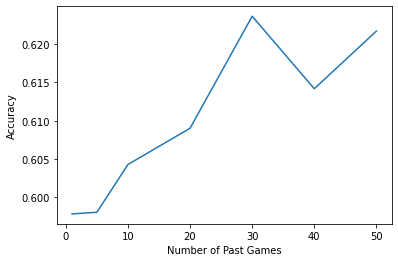

In [ ]:
accuracies = [metrics.accuracy_score(y_test_1, y_pred_1), metrics.accuracy_score(y_test_5, y_pred_5), metrics.accuracy_score(y_test_10, y_pred_10), 
              metrics.accuracy_score(y_test_20, y_pred_20), metrics.accuracy_score(y_test_30, y_pred_30), metrics.accuracy_score(y_test_40, y_pred_40),
              metrics.accuracy_score(y_test_50, y_pred_50)]
plt.plot([1,5,10,20,30,40,50], accuracies)
plt.xlabel('Number of Past Games')
plt.ylabel('Accuracy')

In [ ]:
from sklearn.svm import LinearSVC
lclf = LinearSVC(random_state=0, tol=1e-5, max_iter=1000)
lclf.fit(x_train_10, y_train_10)
lclf.score(x_test_10,y_test_10)

0.6027926960257788

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
knn = KNeighborsClassifier(n_neighbors=80)
knn.fit(x_train_10, y_train_10)
knn.score(x_test_10, y_test_10)

0.5926960257787326

In [ ]:
from sklearn.svm import SVC
from sklearn import svm
clf = SVC(gamma='scale',probability=True)
clf.fit(x_train_10, y_train_10)
clf.score(x_test_10,y_test_10)

0.59656283566058

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
advclf = BaggingClassifier(base_estimator=SVC(gamma='scale'), n_estimators=10, random_state=0)
advclf.fit(x_train_10, y_train_10)
advclf.score(x_test_10,y_test_10)

0.5952738990332975

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(max_depth=8, random_state=0, n_estimators=300)
rdf.fit(x_train_10, y_train_10)
rdf.score(x_test_10,y_test_10)

0.6002148227712137

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgbModel = XGBClassifier()
xgbModel.fit(x_train_10, y_train_10)
xgbPredictions = xgbModel.predict(x_test_10)
xgbAccuracy = accuracy_score(y_test_10, xgbPredictions)
xgbAccuracy

0.6100966702470462

In [ ]:
NN_model_10 = keras.Sequential()
NN_model_10.add(keras.layers.Dense(12, activation='relu'))
NN_model_10.add(keras.layers.Dense(1, activation='sigmoid'))
NN_model_10.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
NN_model_10_history = NN_model_10.fit(x_train_10, y_train_10, batch_size=128, 
                                      verbose = 0, epochs=20, validation_split=0.2)

In [ ]:
NN_model_30 = keras.Sequential()
NN_model_30.add(keras.layers.Dense(12, activation='relu'))
NN_model_30.add(keras.layers.Dense(1, activation='sigmoid'))
NN_model_30.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
NN_model_30_history = NN_model_30.fit(x_train_30, y_train_30, batch_size=128, 
                                      verbose = 2, epochs=20, validation_split=0.2)
NN_model_30.evaluate(x_test_30, y_test_30)

Epoch 1/20
117/117 - 4s - loss: 0.6793 - accuracy: 0.5860 - val_loss: 0.6753 - val_accuracy: 0.5969 - 4s/epoch - 31ms/step
Epoch 2/20
117/117 - 0s - loss: 0.6783 - accuracy: 0.5878 - val_loss: 0.6789 - val_accuracy: 0.5969 - 425ms/epoch - 4ms/step
Epoch 3/20
117/117 - 1s - loss: 0.6781 - accuracy: 0.5878 - val_loss: 0.6753 - val_accuracy: 0.5969 - 516ms/epoch - 4ms/step
Epoch 4/20
117/117 - 1s - loss: 0.6775 - accuracy: 0.5878 - val_loss: 0.6764 - val_accuracy: 0.5969 - 507ms/epoch - 4ms/step
Epoch 5/20
117/117 - 0s - loss: 0.6771 - accuracy: 0.5878 - val_loss: 0.6742 - val_accuracy: 0.5969 - 433ms/epoch - 4ms/step
Epoch 6/20
117/117 - 0s - loss: 0.6767 - accuracy: 0.5878 - val_loss: 0.6732 - val_accuracy: 0.5969 - 415ms/epoch - 4ms/step
Epoch 7/20
117/117 - 0s - loss: 0.6761 - accuracy: 0.5878 - val_loss: 0.6739 - val_accuracy: 0.5969 - 425ms/epoch - 4ms/step
Epoch 8/20
117/117 - 0s - loss: 0.6758 - accuracy: 0.5878 - val_loss: 0.6724 - val_accuracy: 0.5969 - 414ms/epoch - 4ms/step
Ep

[0.6699526309967041, 0.5899033546447754]

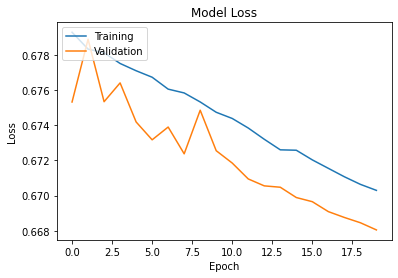

In [ ]:
plot_loss(NN_model_30_history)

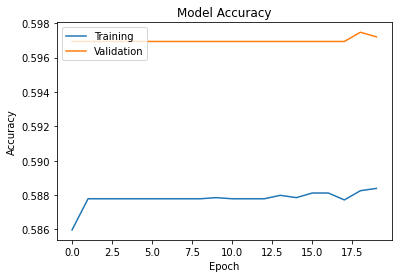

In [ ]:
plot_accuracy(NN_model_30_history)

In [ ]:
NN_model_10.evaluate(x_test_10, y_test_10)

146/146 [==============================] - 0s 1ms/step - loss: 0.6672 - accuracy: 0.5878


[0.6671990156173706, 0.5877550840377808]